# Data Mining

############################################################################################################################

## ASSIGNMENT TASKS


### Perform Exploratory Data Analysis (EDA) and apply basic statistical concepts to understand the underlying data 

#### Loading the diamonds data

&#167;  In the first task, we are going to load the data into a DataFrame using the standard [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html?highlight=read_csv#pandas.read_csv).

In [143]:
#Load pandas library
import pandas as pd 
#Reading the diamonds data
data = pd.read_csv('https://git.io/JUGqS')

In [144]:

data =pd.DataFrame(data)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [145]:
data = data.dropna()
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74



After loading the dataset, answer the following basic questions using the data:

## 1. What is the median price of a diamond over the entire dataset?

The mean is the average of the numbers

In [146]:
data['price'].median()

2401.0

## 2. What is the mean?

The mean is the average of the numbers

In [147]:
data.mean()

carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

In [148]:
data.mean().price

3932.799721913237

## 3. Of the diamonds between 1.50 and 3 carats, what is the median price?

In [149]:
data.loc[(data.carat >=1.50) & (data.carat <=3.00)].median().price

12165.0

## 4. How many _Premium_ cut diamonds with _VVS1_, _I1_ and _IF_ clarity are there (regardless of color)?

In [150]:
data.loc[ ( data.clarity.str.contains('VVS.', regex=True) | 
    (data.clarity.str.contains('.I1', regex=True)) | (data.clarity == 'IF') ) &
    ((data.cut == 'Premium')) ].carat.count()

5291

## 5. For diamonds between $3500- $ 7000, what is the mean carat size?

In [151]:
data.loc[(data.price >=3500) & (data.price <=7000)].mean().carat

1.0535491291489074

 ## Multi-Index DataFrame

#### * in your Multindex DataFrame  the row indices are nested with _cut_ in the outer index, _color_ in the inner index.



#### * the columns will be the _clarity_


#### * the values for a given `(cut, color, clarity)` will the _mean_ value for that combination.  For example,

# 1. Please make sure you output the multi-index DataFrame so that I can see it

In [152]:
data_multi_dia_results= data.groupby(['cut','color','clarity'])['price'].mean().unstack()
data_multi_dia_results

clarity                   I1            IF          SI1          SI2  \
cut       color                                                        
Fair      D      7383.000000   1619.666667  4273.344828  4355.142857   
          E      2095.222222           NaN  3901.153846  4172.384615   
          F      2543.514286   2344.000000  3784.686747  4520.112360   
          G      3187.471698   1488.000000  3579.362319  5665.150000   
          H      4212.961538           NaN  5195.800000  6022.406593   
          I      3501.000000           NaN  4574.966667  6658.022222   
          J      5795.043478           NaN  4553.928571  5131.814815   
Good      D      3490.750000  10030.333333  3021.172996  3595.295964   
          E      4398.130435   1519.222222  3162.132394  3785.490099   
          F      2569.526316   3132.866667  3261.454212  4426.786070   
          G      3195.789474   4060.136364  4129.328502  4776.411043   
          H      3849.714286   5948.750000  4179.285106  5529.778481   
          I      4175.444444   1749.333333  4742.945455  6933.012346   
          J      3794.500000   2738.000000  4627.625000  5306.113208   
Ideal     D      3526.923077   6567.178571  2490.459350  3142.047753   
          E      3559.388889   3258.936709  2883.808094  3891.302772   
          F      3903.452381   2153.708955  3710.322368  4335.507726   
          G      4044.437500   2206.030550  3441.107576  4612.086420   
          H      5415.184211   1982.765487  4769.988204  5589.473333   
          I      4103.294118   1502.621053  5178.565476  7191.912409   
          J      9454.000000   2489.000000  5115.674897  6555.172727   
Premium   D      3818.750000   9056.500000  3236.377698  4351.085511   
          E      3199.266667   4525.444444  3362.625407  4489.930636   
          F      3554.558824   3617.580645  4040.467105  4747.089866   
          G      4051.521739   3311.114943  4303.348057  5617.205285   
          H      3904.347826   3384.750000  5707.722137  6718.946257   
          I      5044.625000   2358.565217  6092.092643  7148.483974   
          J      4577.230769   7026.000000  5726.578947  7550.285714   
Very Good D      2622.800000  10298.260870  3234.931174  4425.458599   
          E      3443.545455   4332.744186  3228.175719  4279.447191   
          F      4252.923077   4677.074627  3574.291592  4249.758017   
          G      3194.812500   3525.240506  3481.871308  4699.269113   
          H      5258.833333   2647.689655  4933.945155  6112.413994   
          I      6045.125000   4093.894737  5195.301676  6621.600000   
          J      4478.375000   1074.125000  5026.543956  5992.898438   

clarity                  VS1          VS2         VVS1         VVS2  
cut       color                                                      
Fair      D      2921.200000  4512.880000  4473.000000  3607.000000  
          E      3307.928571  3041.714286  4115.333333  3119.307692  
          F      4103.060606  3400.471698  4679.800000  4018.200000  
          G      3497.622222  5384.444444  2216.333333  3099.058824  
          H      4604.750000  5110.926829  4115.000000  3481.727273  
          I      4500.480000  3856.125000  4194.000000  2994.625000  
          J      5906.187500  4067.826087  1691.000000  2998.000000  
Good      D      3556.581395  3588.461538  2586.230769  2345.640000  
          E      3712.775281  3772.018750  1905.953488  3390.153846  
          F      2787.507576  3790.543478  2189.514286  3192.360000  
          G      4302.427632  4140.713542  2705.195122  3310.466667  
          H      3819.116883  4433.043478  1719.709677  2428.000000  
          I      4597.165049  5956.563636  2650.954545  2758.000000  
          J      3662.826923  4803.166667  4633.000000  4371.153846  
Ideal     D      2576.039886  2111.927174  2705.777778  3619.014085  
          E      2175.797639  2163.323944  2205.519403  2556.335306  
          F      3504.001623  3317.204778  2611.234091  3323.628846  
     

In [153]:
multi_idx = pd.MultiIndex.from_tuples(data_multi_dia_results.index, names=['cut', 'color'])

In [154]:
data_multi_df = pd.DataFrame(data_multi_dia_results,index=multi_idx, columns=data_multi_dia_results.columns)
data_multi_df

clarity                   I1            IF          SI1          SI2  \
cut       color                                                        
Fair      D      7383.000000   1619.666667  4273.344828  4355.142857   
          E      2095.222222           NaN  3901.153846  4172.384615   
          F      2543.514286   2344.000000  3784.686747  4520.112360   
          G      3187.471698   1488.000000  3579.362319  5665.150000   
          H      4212.961538           NaN  5195.800000  6022.406593   
          I      3501.000000           NaN  4574.966667  6658.022222   
          J      5795.043478           NaN  4553.928571  5131.814815   
Good      D      3490.750000  10030.333333  3021.172996  3595.295964   
          E      4398.130435   1519.222222  3162.132394  3785.490099   
          F      2569.526316   3132.866667  3261.454212  4426.786070   
          G      3195.789474   4060.136364  4129.328502  4776.411043   
          H      3849.714286   5948.750000  4179.285106  5529.778481   
          I      4175.444444   1749.333333  4742.945455  6933.012346   
          J      3794.500000   2738.000000  4627.625000  5306.113208   
Ideal     D      3526.923077   6567.178571  2490.459350  3142.047753   
          E      3559.388889   3258.936709  2883.808094  3891.302772   
          F      3903.452381   2153.708955  3710.322368  4335.507726   
          G      4044.437500   2206.030550  3441.107576  4612.086420   
          H      5415.184211   1982.765487  4769.988204  5589.473333   
          I      4103.294118   1502.621053  5178.565476  7191.912409   
          J      9454.000000   2489.000000  5115.674897  6555.172727   
Premium   D      3818.750000   9056.500000  3236.377698  4351.085511   
          E      3199.266667   4525.444444  3362.625407  4489.930636   
          F      3554.558824   3617.580645  4040.467105  4747.089866   
          G      4051.521739   3311.114943  4303.348057  5617.205285   
          H      3904.347826   3384.750000  5707.722137  6718.946257   
          I      5044.625000   2358.565217  6092.092643  7148.483974   
          J      4577.230769   7026.000000  5726.578947  7550.285714   
Very Good D      2622.800000  10298.260870  3234.931174  4425.458599   
          E      3443.545455   4332.744186  3228.175719  4279.447191   
          F      4252.923077   4677.074627  3574.291592  4249.758017   
          G      3194.812500   3525.240506  3481.871308  4699.269113   
          H      5258.833333   2647.689655  4933.945155  6112.413994   
          I      6045.125000   4093.894737  5195.301676  6621.600000   
          J      4478.375000   1074.125000  5026.543956  5992.898438   

clarity                  VS1          VS2         VVS1         VVS2  
cut       color                                                      
Fair      D      2921.200000  4512.880000  4473.000000  3607.000000  
          E      3307.928571  3041.714286  4115.333333  3119.307692  
          F      4103.060606  3400.471698  4679.800000  4018.200000  
          G      3497.622222  5384.444444  2216.333333  3099.058824  
          H      4604.750000  5110.926829  4115.000000  3481.727273  
          I      4500.480000  3856.125000  4194.000000  2994.625000  
          J      5906.187500  4067.826087  1691.000000  2998.000000  
Good      D      3556.581395  3588.461538  2586.230769  2345.640000  
          E      3712.775281  3772.018750  1905.953488  3390.153846  
          F      2787.507576  3790.543478  2189.514286  3192.360000  
          G      4302.427632  4140.713542  2705.195122  3310.466667  
          H      3819.116883  4433.043478  1719.709677  2428.000000  
          I      4597.165049  5956.563636  2650.954545  2758.000000  
          J      3662.826923  4803.166667  4633.000000  4371.153846  
Ideal     D      2576.039886  2111.927174  2705.777778  3619.014085  
          E      2175.797639  2163.323944  2205.519403  2556.335306  
          F      3504.001623  3317.204778  2611.234091  3323.628846  
     

In [155]:
data_multi_df.loc['Ideal']

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
color,,,,,,,,
D,3526.923077,6567.178571,2490.459350,3142.047753,2576.039886,2111.927174,2705.777778,3619.014085
E,3559.388889,3258.936709,2883.808094,3891.302772,2175.797639,2163.323944,2205.519403,2556.335306
F,3903.452381,2153.708955,3710.322368,4335.507726,3504.001623,3317.204778,2611.234091,3323.628846
G,4044.437500,2206.030550,3441.107576,4612.086420,4116.918153,4310.035165,2909.198653,3795.651163
H,5415.184211,1982.765487,4769.988204,5589.473333,3613.325482,4039.125899,1915.984663,2591.155709
I,4103.294118,1502.621053,5178.565476,7191.912409,3944.421569,4663.383562,2034.396648,2858.679775
J,9454.000000,2489.000000,5115.674897,6555.172727,4734.427861,4867.133621,2000.172414,4121.925926


In [156]:
data_multi_df.loc[('Ideal','E')]
data_multi_df.loc[('Ideal','E')].SI1

2883.808093994778

In [157]:
data_multi_df.loc[['Ideal','Premium']]

clarity                 I1           IF          SI1          SI2  \
cut     color                                                       
Ideal   D      3526.923077  6567.178571  2490.459350  3142.047753   
        E      3559.388889  3258.936709  2883.808094  3891.302772   
        F      3903.452381  2153.708955  3710.322368  4335.507726   
        G      4044.437500  2206.030550  3441.107576  4612.086420   
        H      5415.184211  1982.765487  4769.988204  5589.473333   
        I      4103.294118  1502.621053  5178.565476  7191.912409   
        J      9454.000000  2489.000000  5115.674897  6555.172727   
Premium D      3818.750000  9056.500000  3236.377698  4351.085511   
        E      3199.266667  4525.444444  3362.625407  4489.930636   
        F      3554.558824  3617.580645  4040.467105  4747.089866   
        G      4051.521739  3311.114943  4303.348057  5617.205285   
        H      3904.347826  3384.750000  5707.722137  6718.946257   
        I      5044.625000  2358.565217  6092.092643  7148.483974   
        J      4577.230769  7026.000000  5726.578947  7550.285714   

clarity                VS1          VS2         VVS1         VVS2  
cut     color                                                      
Ideal   D      2576.039886  2111.927174  2705.777778  3619.014085  
        E      2175.797639  2163.323944  2205.519403  2556.335306  
        F      3504.001623  3317.204778  2611.234091  3323.628846  
        G      4116.918153  4310.035165  2909.198653  3795.651163  
        H      3613.325482  4039.125899  1915.984663  2591.155709  
        I      3944.421569  4663.383562  2034.396648  2858.679775  
        J      4734.427861  4867.133621  2000.172414  4121.925926  
Premium D      4178.045802  2919.356932  3771.000000  3888.436170  
        E      3721.695205  3070.394277  2699.857143  2940.942149  
        F      4758.037931  4221.466882  3969.325000  4099.465753  
        G      4435.823322  4556.255201  2933.654971  4323.570909  
        H      3949.336310  5553.875940  1453.758929  2651.262712  
        I      5339.366516  7156.346032  1831.083333  3190.768293  
        J      5817.261438  6175.559406  7244.375000  6423.352941

### Now that you have the DataFrame. there is one last thing to do so that you can answer some more interesting questions.

##  SEABORN CODE
```python
   import seaborn as sns

   cm = sns.light_palette("green", as_cmap=True)
   df_multi_idx.astype('float').style.background_gradient(cmap=cm)
```

In [158]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
data_multi_df.astype('float').style.background_gradient(cmap=cm)

C:\Users\sh\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


## Now answer the following questions:



### 1. If we are looking at _J color, Ideal cut_ diamonds, what seems unusual about the _I1 clarity_ mean price? Recall, _J color_ are considered the color right before faint yellow and are considered the least quality color rating.




In [159]:
data_multi_df.loc[('Ideal','J')].I1

9454.0

In [160]:
def set_color(val):
    if val == data_multi_df.loc[('Ideal','J')].I1:
        color = 'yellow'
    else: 
        color = "lightgreen"
    return 'background: %s' % color 

In [161]:
data_multi_df.style.applymap(set_color)

### 2. Can you make a general observation about the average prices trends?  What are you noticing, especially about the average prices as the color gets worse?


Ans:- White color is the average price trends based on the general obserbation. From the graph light green color(looks like white color).

### 3. Which _cut, color_ and _clarity_ has the highest overall mean price?

In [162]:
#cut
list(data_multi_df.idxmax())[1][0]

'Very Good'

In [163]:
#color
list(data_multi_df.idxmax())[1][1]

'D'

In [164]:
#Clarity
data_multi_df.max().idxmax()

'IF'

In [165]:
#highest overall mean price
max(data_multi_df.max().tolist())

10298.260869565218

The 'Very Good' cut, 'D' color and 'IF' Clarity has the highest overall mean price 10298.260869565218

## § Now that you have seen a trend on prices, instead of computing the mean price,  compute the mean carat size of the diamond and perform the same tabular gradient enhancement. Answer the following questionsn looking at the tables you've generated:

In [166]:
#Mean Price for Carat
caratmean_price_df = data.groupby(['cut','color','clarity']).mean().carat.unstack()
#MultiIndex Form
caratmean_price_multi_index = pd.MultiIndex.from_tuples(caratmean_price_df.index, names=['cut', 'color'])
#Create a dataframe
carat_multi_resulsts = pd.DataFrame(caratmean_price_df,index=caratmean_price_multi_index, columns=caratmean_price_df.columns)
carat_multi_resulsts

clarity                I1        IF       SI1       SI2       VS1       VS2  \
cut       color                                                               
Fair      D      1.877500  0.380000  0.913793  1.016964  0.630000  0.843600   
          E      0.968889       NaN  0.867077  1.015641  0.632857  0.690238   
          F      1.023429  0.555000  0.864096  1.080112  0.804848  0.758679   
          G      1.226415  0.455000  0.909565  1.262000  0.774222  0.977778   
          H      1.498654       NaN  1.112267  1.364396  0.975937  1.036829   
          I      1.322941       NaN  1.108000  1.511556  1.010400  0.953125   
          J      1.993478       NaN  1.181071  1.316667  1.229375  1.032609   
Good      D      1.040000  0.786667  0.700802  0.858251  0.663256  0.702500   
          E      1.330870  0.373333  0.723859  0.882574  0.680674  0.739375   
          F      0.976316  0.533333  0.768278  1.002537  0.624621  0.752120   
          G      1.174211  0.648182  0.883816  1.086933  0.779211  0.815677   
          H      1.252143  0.935000  0.906723  1.173544  0.779870  0.877971   
          I      1.410000  0.530000  1.015273  1.424815  0.926602  1.129636   
          J      1.370000  0.690000  1.125795  1.318868  0.875000  1.114333   
Ideal     D      0.960000  0.615714  0.594797  0.750309  0.533504  0.499293   
          E      1.037778  0.457722  0.670627  0.874414  0.503592  0.521136   
          F      1.107857  0.411493  0.769605  0.932185  0.644042  0.632241   
          G      1.168750  0.454705  0.760258  0.976111  0.717146  0.769703   
          H      1.475526  0.474602  0.937208  1.143822  0.706531  0.796043   
          I      1.298235  0.451474  1.027639  1.378467  0.806103  0.927900   
          J      1.990000  0.576800  1.143909  1.384455  0.978358  1.051250   
Premium   D      1.155000  0.708000  0.691655  0.918907  0.687099  0.584572   
          E      1.043000  0.576296  0.726287  0.957669  0.643151  0.618935   
          F      1.135294  0.525484  0.842122  1.035220  0.767345  0.730953   
          G      1.291304  0.564023  0.882721  1.142703  0.750177  0.809459   
          H      1.339783  0.598000  1.084046  1.328292  0.779613  1.004643   
          I      1.605833  0.573043  1.180354  1.424006  0.982624  1.235905   
          J      1.578462  1.141667  1.257799  1.554534  1.136209  1.245743   
Very Good D      0.950000  0.803043  0.707834  0.931720  0.583371  0.633657   
          E      1.069545  0.579302  0.723083  0.930404  0.609795  0.664414   
          F      1.210769  0.606866  0.796458  0.951195  0.688055  0.742017   
          G      1.123750  0.600380  0.785759  1.032752  0.701319  0.810271   
          H      1.654167  0.558276  0.973967  1.234636  0.772335  0.893165   
          I      1.766250  0.764737  1.065894  1.334350  0.985415  1.066350   
          J      1.462500  0.455000  1.135330  1.360938  0.964917  1.140543   

clarity              VVS1      VVS2  
cut       color                      
Fair      D      0.606667  0.591111  
          E      0.640000  0.600769  
          F      0.668000  0.627000  
          G      0.570000  0.664706  
          H      0.910000  0.840909  
          I      0.900000  0.845000  
          J      0.700000  1.010000  
Good      D      0.490769  0.481200  
          E      0.418140  0.560192  
          F      0.465714  0.607600  
          G      0.547073  0.626133  
          H      0.473548  0.588444  
          I      0.666364  0.719615  
          J      1.000000  0.936923  
Ideal     D      0.460139  0.544789  
          E      0.426507  0.483905  
          F      0.476182  0.577308  
          G      0.539108  0.646085  
          H      0.493497  0.567301  
          I      0.551341  0.653820  
          J      0.578276  0.870556  
Premium   D      0.538250  0.580532  
          E      0.462286  0.511570  
          F      0.606250  0.657603  
          G      0.535146  0.692655  
          H      0.416250  0.577458  
          I 

In [167]:
#SEABORN CODE
carat_multi_resulsts.astype('float').style.background_gradient(cmap=cm)

 ## Answer the following questions looking at the tables you've generated:


### 1. What seems to be the trend in carat size, especially as it relates to cut and color?

Ans:-

In [168]:
data_multi_df.astype('float').style.background_gradient(cmap=cm).highlight_max(axis=0, color='yellow')

### 2. Which cut (regardless of color) has the largest mean carat size?  Is this a surprising outcome?
###  Explain in a sentence or two what you think is going on?



In [169]:
print(data_multi_df.idxmax().max()[0]," has the larget mean carat size ",data_multi_df.max().max())

Very Good  has the larget mean carat size  10298.260869565218


Plot a scatterplot of all the raw data with price on the $y$-axis and carats on the $x$-axis using
this as a template:

```python
      your_dataframe.loc[:,['price','carat']].plot(kind='scatter', x='carat', y='price')
```

### 1. Does your plot support the claim that price increases as carats increase?

#### Ans:

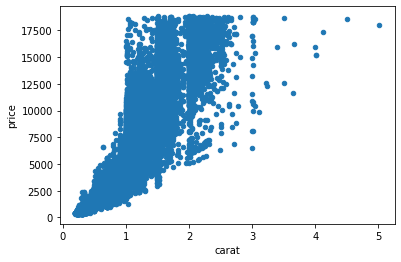

In [170]:
 data.loc[:,['price','carat']].plot(kind='scatter', x='carat', y='price')

The price(y-axes) and carat (x-axes) both are increases vice versa.
so that price depends on the carat and gold measers in carat.
Thus the price values increases as carats values increase.

# (35%) Explore PDF and CDF with Pandas and Seaborn

The first thing want to do is look at the cumulative distribution of one variable -- carat. 

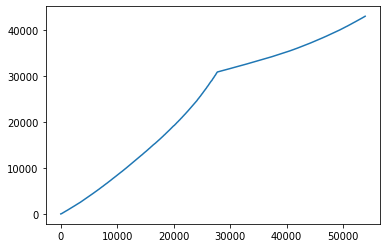

In [171]:
import matplotlib.pyplot as plt

def Cumulative(lists): 
    cu_list = [] 
    length = len(lists) 
    cu_list = [sum(lists[0:x:1]) for x in range(0, length+1)] 
    return cu_list[1:]
 
plt.plot(Cumulative(data['carat']))

### Cumulative Histogram:

C:\Users\sh\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


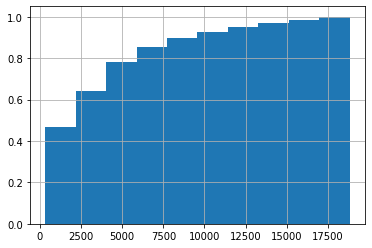

In [172]:
#cumulative histogram
data['price'].hist( cumulative = True,normed=1 )

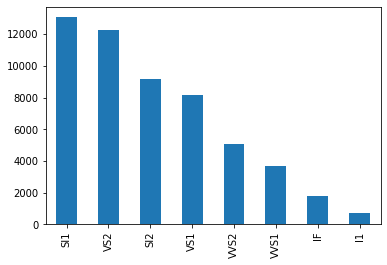

In [173]:
#Clarity Count Plot
data['clarity'].value_counts().plot(kind='bar',x='name',y='age')

### 1. Produce a count of the diamond clarities using the [`pandas.DataFrame.value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html?highlight=value_counts#pandas.DataFrame.value_counts) method.  Show the count of diamonds on a bar graph using [`plot(kind="bar")`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot).


Text(0, 0.5, 'Count of Diamond Clarities')

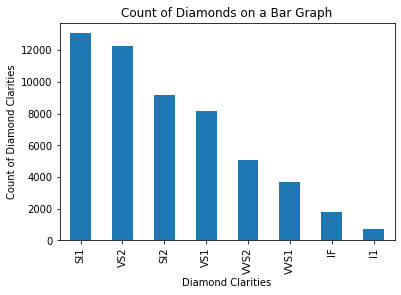

In [174]:
#a simple line plot
data['clarity'].value_counts().plot(kind='bar',x='Diamond Clarities',y='Count of Diamond Clarities')
plt.title('Count of Diamonds on a Bar Graph')
plt.xlabel('Diamond Clarities')
plt.ylabel('Count of Diamond Clarities')

### 2. What observation can you make about the trend in the count of diamonds in each clarity category?


In [175]:
print("Clarity max",data['clarity'].value_counts().index[0],"and max value is ",data['clarity'].value_counts()[0])
print("Clarity min",data['clarity'].value_counts().index[len(data['clarity'].value_counts())-1],"and min value is ",data['clarity'].value_counts()[len(data['clarity'].value_counts())-1])

Clarity max SI1 and max value is  13065
Clarity min I1 and min value is  741


### 3. How do the numbers of diamonds in the "SI" and "IF/FL" groups compare?


In [176]:
data.loc[(data['clarity'] == 'FL')]

,carat,cut,color,clarity,depth,table,price,x,y,z


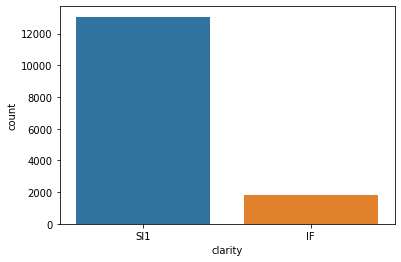

In [177]:
sns.countplot(x="clarity", data=data.loc[(data['clarity'] == 'IF') | (data['clarity'] == 'SI1') | (data['clarity'] == 'FL')])

&#167;  Now that we have an understanding of how many diamonds we have in each clarity group, let's compare the
distribution of carats for each.  To do this we are going to turn to Seaborn's `distplot()` method.
Read about `distplot()` [here](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot), but
this template of code should help you plot what you need:

```python
    import seaborn as sns
    import matlplotlib.pyplot as plt

    plt.title("Comparing Cumulative Distribution of Carat for I1, IF, SI1 and SI2")

    kwargs = {'cumulative': True}

    sns.distplot(the_dataframe_with_clarity_X, hist=False, hist_kws=kwargs, kde_kws=kwargs, label="clarity_X")
    # repeat for the other clarities you want compare

```

You now have a cumulative distribution for each clarity. Figure 5 shows you an example of what **one** of the plots
might look like. 

![Cumulative distribution plot example](./example_distc_plot_240.png)


You will be reminded that the $y$-axis shows us
the cumulative probability while the $x$-axis shows us the carat sizes.  The smoothed curve shows the density
of the carat for a given probability and uses a smoothing technique called _kernel density estimate_.


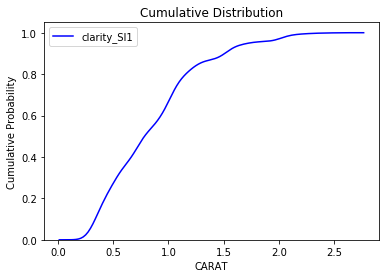

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title("Cumulative Distribution")
plt.ylabel("Cumulative Probability")
plt.xlabel("Carat Size")
kwargs = {'cumulative': True}

sns.distplot(data.loc[(data['clarity'] == 'SI1')].carat, hist=False, hist_kws=kwargs, kde_kws=kwargs, color='blue', label="clarity_SI1",axlabel="CARAT")


In [179]:
colors_list =["red","green","blue","black","tomato","pink","aqua","midnightblue"]

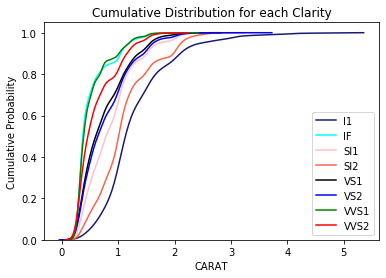

In [180]:
plt.title("Cumulative Distribution for each Clarity")
plt.ylabel("Cumulative Probability")
plt.xlabel("Carat Size")
sns.distplot(data.loc[(data['clarity'] == 'I1') ].carat, hist=False, hist_kws=kwargs, kde_kws=kwargs, color='midnightblue', label='I1',axlabel="CARAT")
sns.distplot(data.loc[(data['clarity'] == 'IF') ].carat, hist=False, hist_kws=kwargs, kde_kws=kwargs, color='aqua', label='IF',axlabel="CARAT")
sns.distplot(data.loc[(data['clarity'] == 'SI1') ].carat, hist=False, hist_kws=kwargs, kde_kws=kwargs, color='pink', label='SI1',axlabel="CARAT")
sns.distplot(data.loc[(data['clarity'] == 'SI2') ].carat, hist=False, hist_kws=kwargs, kde_kws=kwargs, color='tomato', label='SI2',axlabel="CARAT")
sns.distplot(data.loc[(data['clarity'] == 'VS1') ].carat, hist=False, hist_kws=kwargs, kde_kws=kwargs, color='black', label='VS1',axlabel="CARAT")
sns.distplot(data.loc[(data['clarity'] == 'VS2') ].carat, hist=False, hist_kws=kwargs, kde_kws=kwargs, color='blue', label='VS2',axlabel="CARAT")
sns.distplot(data.loc[(data['clarity'] == 'VVS1') ].carat, hist=False, hist_kws=kwargs, kde_kws=kwargs, color='green', label='VVS1',axlabel="CARAT")
sns.distplot(data.loc[(data['clarity'] == 'VVS2') ].carat, hist=False, hist_kws=kwargs, kde_kws=kwargs, color='red', label='VVS2',axlabel="CARAT")


## After displaying the plot from the code above in your notebook, answer the following questions:

### 1. Which clarity has the largest relative distribution of high carat diamonds?


In [181]:
data_multi_df.max()

clarity
I1       9454.000000
IF      10298.260870
SI1      6092.092643
SI2      7550.285714
VS1      5906.187500
VS2      7156.346032
VVS1     7244.375000
VVS2     6423.352941
dtype: float64

In [182]:
data_multi_df.max().max()

10298.260869565218

In [183]:
data_multi_df.max().idxmax()

'IF'

In [184]:
 print(data_multi_df.max().idxmax(),'has the largest relative distribution of high carat diamonds ')

IF has the largest relative distribution of high carat diamonds 


### 2. Which has the largest relative distribution of small diamonds?


In [185]:
data_multi_df.max()

clarity
I1       9454.000000
IF      10298.260870
SI1      6092.092643
SI2      7550.285714
VS1      5906.187500
VS2      7156.346032
VVS1     7244.375000
VVS2     6423.352941
dtype: float64

In [186]:
data_multi_df.max().min()

5906.1875

In [187]:
print(data_multi_df.max().idxmin(),'has the largest relative distribution of small diamonds.')

VS1 has the largest relative distribution of small diamonds.


### 3. Based on the prior two questions, is this a surprising outcome?


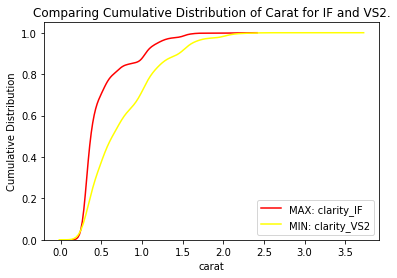

In [188]:
# Yes, The Prior two questions, as show the surprising outcome
plt.title("Comparing Cumulative Distribution of Carat for IF and VS2.")
plt.xlabel("CARAT SIZE")
plt.ylabel("Cumulative Distribution")
sns.distplot(data.loc[(data['clarity'] == 'IF') ].carat, hist=False, hist_kws=kwargs, kde_kws=kwargs, color='red', label="MAX: clarity_IF")
sns.distplot(data.loc[(data['clarity'] == 'VS2') ].carat, hist=False, hist_kws=kwargs, kde_kws=kwargs, color='yellow', label="MIN: clarity_VS2")


### 4. Which two distributions look most similar?

Ans:-
    SI1 snd SI2 are two distributions look most similar.


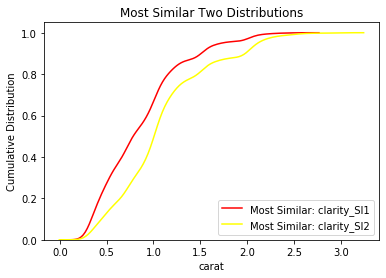

In [189]:
# Yes, The Prior two questions, as show the surprising outcome
plt.title("Most Similar Two Distributions")
plt.xlabel("CARAT SIZE")
plt.ylabel("Cumulative Distribution")
sns.distplot(data.loc[(data['clarity'] == 'SI1') ].carat, hist=False, hist_kws=kwargs, kde_kws=kwargs, color='red', label="Most Similar: clarity_SI1")
sns.distplot(data.loc[(data['clarity'] == 'SI2') ].carat, hist=False, hist_kws=kwargs, kde_kws=kwargs, color='yellow', label="Most Similar: clarity_SI2")



&#167;  We're now at the point where we'd like to graph this same data in two dimensions, with what is called the _kernel density estimate plot_ or KDE plot. 

The KDE plot takes our bivariate data as input and outputs a smoothed 2D contour plot.  

You see, in the example above, we only showed a single feature of the
data.  While interesting, it is far more interesting when we compare two variables.  

Indeed, since diamonds are generally considered a luxury item, and not typically considered "inexpensive", we might like
to know how _carat_ size influences _price_.  

This makes things a bit more interesting and useful.

We're going to use the KDE plot to visually compare the densities of _carat_ and _price_.

```python
    plt.title("KDE Plot of Price to Carat for X and Y")

    # dataset X
    sns.kdeplot(
        x_carat,
        x_price,
        cmap="Reds",
        shade=True,
        shade_lowest=False, label="x_label")

    # dataset Y
    sns.kdeplot(
        y_carat,
        y_price,
        cmap="Blues",
        shade=True,
        shade_lowest=False, label="y_label")

    plt.legend()
    plt.savefig("your_plot_can_be_saved.png")
```

Your plot will look something like that in Figure 3 below.  

If you notice in the figure the densities show that SI2 has a broad distribution between a depth of 58 and 65, while the price varies greatly reaching well above $10,000.  You can see IF diamonds are much tighter both in terms of price and depth.
![KDE Plot for depth vs. price (SI2 and IF clarity)](./2d_kde_plot.png)

You may want to only plot each alone or no more than 2 per plot so you can see the data.
After you have the plots, make sure you save them and include them in your zipped submission. 

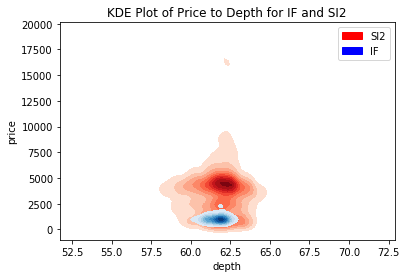

In [191]:
plt.title("KDE Plot of Price to Depth for IF and SI2")
# dataset X
sns.kdeplot(
    data.loc[(data['clarity'] == 'SI2')]['depth'],
    data.loc[(data['clarity'] == 'SI2')]['price'],
    cmap="Reds",
    color='r',
    shade=True,
    shade_lowest=False, label="SI2")

# dataset Y
sns.kdeplot(
    data.loc[(data['clarity'] == 'IF')]['depth'],
    data.loc[(data['clarity'] == 'IF')]['price'],
    color='b',
    cmap="Blues",
    shade=True,
    shade_lowest=False, label="IF")

plt.legend()
plt.savefig("your_plot_can_be_saved.png")

No handles with labels found to put in legend.


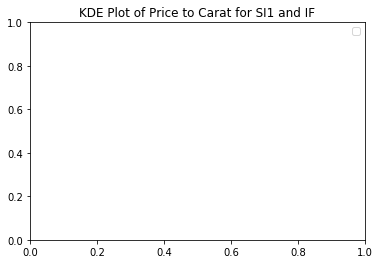

In [219]:
plt.title("KDE Plot of Price to Carat for SI1 and IF")
# dataset X
sns.kdeplot(
    data.loc[(data['clarity'] == 'SI2')]['carat'],
    data.loc[(data['clarity'] == 'SI2')]['price'],
    cmap="Reds",
    color='r',
    shade=True,
    shade_lowest=False, label="SI2")

# dataset Y
sns.kdeplot(
    data.loc[(data['clarity'] == 'IF')]['carat'],
    data.loc[(data['clarity'] == 'IF')]['price'],
    cmap="Blues",
    color='b',
    shade=True,
    shade_lowest=False, label="IF")

plt.legend()
plt.savefig("your_plot_can_be_saved.png")

 ## Then answer the questions below based on your plots:

### 1. How do the density plots compare to one another?  What general observation can you make about the typical SI1 and SI2 diamonds?  What are their similarities?

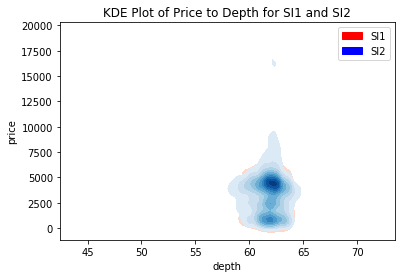

In [192]:
plt.title("KDE Plot of Price to Depth for SI1 and SI2")
# dataset X
sns.kdeplot(
    data.loc[(data['clarity'] == 'SI1')]['depth'],
    data.loc[(data['clarity'] == 'SI1')]['price'],
    cmap="Reds",
    color='r',
    shade=True,
    shade_lowest=False, label="SI1")

# dataset Y
sns.kdeplot(
    data.loc[(data['clarity'] == 'SI2')]['depth'],
    data.loc[(data['clarity'] == 'SI2')]['price'],
    color='b',
    cmap="Blues",
    shade=True,
    shade_lowest=False, label="SI2")

plt.legend()
plt.savefig("your_plot_can_be_saved.png")

### 2. What about the density plots for I1 and IF?  How are they different?  Please provide as much description to support your answer.

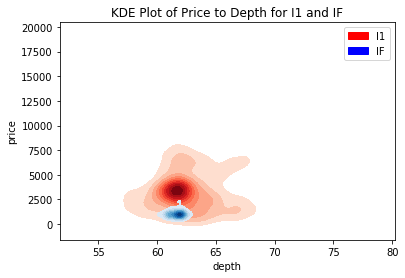

In [193]:
plt.title("KDE Plot of Price to Depth for I1 and IF")
# dataset X
sns.kdeplot(
    data.loc[(data['clarity'] == 'I1')]['depth'],
    data.loc[(data['clarity'] == 'I1')]['price'],
    cmap="Reds",
    color='r',
    shade=True,
    shade_lowest=False, label="I1")

# dataset Y
sns.kdeplot(
    data.loc[(data['clarity'] == 'IF')]['depth'],
    data.loc[(data['clarity'] == 'IF')]['price'],
    color='b',
    cmap="Blues",
    shade=True,
    shade_lowest=False, label="IF")

plt.legend()
plt.savefig("your_plot_can_be_saved.png")




### 3. From the plots alone, what can you make of the price density of 1-carat SI1 diamonds versus those of SI2 diamonds?

C:\Users\sh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\sh\Anaconda3\lib\site-packages\matplotlib\contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\sh\Anaconda3\lib\site-packages\matplotlib\contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\sh\Anaconda3\lib\site-packages\matplotlib\contour.py:1169: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
C:\Users\sh\Anaconda3\lib\site-packages\matplotlib\contour.py:1171: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]


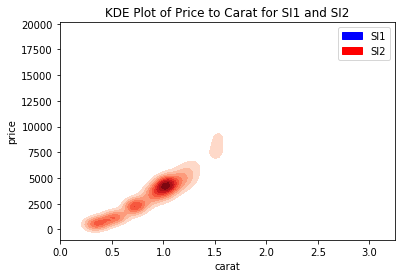

In [194]:

plt.title("KDE Plot of Price to Carat for SI1 and SI2")

# dataset X
sns.kdeplot(
    data.loc[(data['carat'] == 1.0) & (data['clarity'] == 'SI1')]['carat'],
    data.loc[(data['carat'] == 1.0) & (data['clarity'] == 'SI1')]['price'],
    color='b',
    cmap="Blues",
    shade=True,
    shade_lowest=False, label="SI1")

# dataset Y
sns.kdeplot(
    data.loc[(data['clarity'] == 'SI2')]['carat'],
    data.loc[(data['clarity'] == 'SI2')]['price'],
    cmap="Reds",
    color='r',
    shade=True,
    shade_lowest=False, label="SI2")



plt.legend()
plt.savefig("your_plot_can_be_saved.png")

### 4. What would you say of the claim: "If clarity is of great concern to you, the your best value diamonds are in found in the I1 clarity."?  What challenges could you make to this claim based on the KDE plots?  What are the supports for this claim?

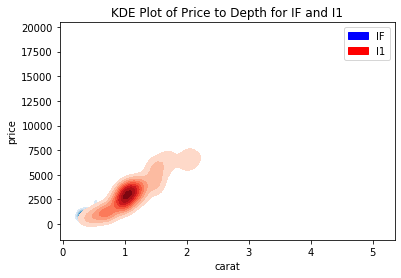

In [195]:
plt.title("KDE Plot of Price to Depth for IF and I1")
# dataset X
sns.kdeplot(
    data.loc[(data['clarity'] == 'IF')]['carat'],
    data.loc[(data['clarity'] == 'IF')]['price'],
    color='b',
    cmap="Blues",
    shade=True,
    shade_lowest=False,
    label="IF")

#plt.title("KDE Plot of Price to Depth for I1")
# dataset Y
sns.kdeplot(
    data.loc[(data['clarity'] == 'I1')]['carat'],
    data.loc[(data['clarity'] == 'I1')]['price'],
    cmap="Reds",
    color='r',
    shade=True,
    shade_lowest=False,
    label="I1")

plt.legend()
plt.savefig("your_plot_can_be_saved.png")

### 5. Write a query using the [`DataFrame.query()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html)   method to show the descriptive statistics for _clarity I1_ and _clarity SI1_ diamonds.  You can use the [`DataFrame.describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html?highlight=describe#pandas.DataFrame.describe) method to get the descriptive statistics.  The query method will restrict diamonds between .95 and 1.05 carats for each color.

#### statistics for clarity I1 Diamonds:
Condition:  clarity == "I1" and carat >= 0.95 and carat <= 1.05

In [196]:
data.query(' clarity == "I1" and carat >= 0.95 and carat <= 1.05 ').describe()

,carat,depth,table,price,x,y,z
count,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000
mean,1.006688,62.381250,58.556250,2687.35625,6.396000,6.342500,3.946312
std,0.025072,2.932237,2.576495,602.89209,0.144476,0.178484,0.332279
min,0.950000,56.100000,53.000000,1262.00000,5.720000,5.590000,0.000000
25%,1.000000,61.000000,57.000000,2216.50000,6.330000,6.260000,3.920000
50%,1.010000,61.800000,58.000000,2794.50000,6.410000,6.390000,3.980000
75%,1.020000,63.125000,60.000000,3172.00000,6.482500,6.460000,4.020000
max,1.050000,78.200000,66.000000,3987.00000,6.700000,6.690000,4.420000


#### statistics for clarity SI1 Diamonds
Condition: clarity == "SI1" and carat >= 0.95 and carat <= 1.05

In [197]:
data.query('clarity == "SI1" and carat >= 0.95 and carat <= 1.05 ').describe()

,carat,depth,table,price,x,y,z
count,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000
mean,1.012493,61.921331,58.209765,4874.370431,6.417938,6.413846,3.971997
std,0.017303,1.884320,2.289164,673.953337,0.110280,0.116083,0.072376
min,0.950000,43.000000,50.000000,2323.000000,6.000000,5.880000,3.660000
25%,1.000000,60.900000,57.000000,4469.000000,6.350000,6.350000,3.940000
50%,1.010000,62.100000,58.000000,4879.000000,6.410000,6.420000,3.980000
75%,1.020000,63.000000,60.000000,5322.000000,6.490000,6.490000,4.020000
max,1.050000,70.600000,67.000000,7564.000000,6.840000,6.770000,4.270000


### 6. Based on that query how can it be used as evidence to support the original claim in question #4 previously?

In [198]:
data.loc[(data['clarity'] == 'IF')]['price'].describe()

count     1790.000000
mean      2864.839106
std       3920.248499
min        369.000000
25%        895.000000
50%       1080.000000
75%       2388.500000
max      18806.000000
Name: price, dtype: float64

In [199]:
data.loc[(data['clarity'] == 'I1')]['price'].describe()

count      741.000000
mean      3924.168691
std       2806.778270
min        345.000000
25%       2080.000000
50%       3344.000000
75%       5161.000000
max      18531.000000
Name: price, dtype: float64

Compare to IF and I1 Clarity, the best value diamond is I1 becaouse the mean value maximun number 3924.168691 compare to IF clarity

## (30%) Explore distance and similarity measures in Pandas and Scikit-learn

### Normalize the data:

In [200]:
from sklearn.preprocessing import normalize
import pandas as pd
import numpy as np


#Mapping Function
def mapping(data,feature):
    featureMap=dict()
    count=0
    for i in sorted(data[feature].unique(),reverse=True):
        featureMap[i]=count
        count=count+1
    data[feature]=data[feature].map(featureMap)
    return data

In [201]:
data = pd.DataFrame(pd.read_csv('https://git.io/JUGqS')).dropna()

In [202]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### 1. Once the data is normalized and your sample has been made, please save the resulting DataFrame to a CSV file called `normalized_datasample_5400k.txt`.  Also make sure the head of this dataset is also displayed in your notebook.

In [203]:
data = mapping(data,"cut")
data = mapping(data,"color")
data = mapping(data,"clarity")
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,5,4,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,5,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,5,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,1,2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,0,4,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,6,5,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,3,6,5,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,0,6,5,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,2,4,61.0,58.0,2757,6.15,6.12,3.74


In [204]:
data.to_csv('normalized_datasample_5400k.txt')
pd.read_csv("normalized_datasample_5400k.txt")

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,2,5,4,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,1,5,5,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,3,5,3,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,1,1,2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,3,0,4,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53935,0.72,2,6,5,60.8,57.0,2757,5.75,5.76,3.50
53936,53936,0.72,3,6,5,63.1,55.0,2757,5.69,5.75,3.61
53937,53937,0.70,0,6,5,62.8,60.0,2757,5.66,5.68,3.56
53938,53938,0.86,1,2,4,61.0,58.0,2757,6.15,6.12,3.74


### 2. NOTE: We have  sample data rows [here in `sample_data.csv`](https://github.com/kmsaumcis/mcis6273_f20_datamining/tree/master/homework/hw1/sample_data.csv) for the next questions.  You might find it just as easy to insert these data into your original dataset and normalize when answering the questions, but there are other ways of doing the same thing.

In [205]:
data = pd.read_csv("sample_data.csv")
data_backup =data
print(data_backup)

    carat        cut color clarity  depth  table  price     x     y     z
0    0.78      Ideal     D     SI1   62.4   57.0   3035  5.87  5.89  3.67
1    0.38      Ideal     G     VS1   62.4   54.0    759  4.63  4.67  2.90
2    0.75      Ideal     D     VS1   62.4   56.0   3961  5.79  5.84  3.63
3    1.12      Ideal     J     VS2   60.1   57.0   4422  6.82  6.75  4.08
4    0.54      Ideal     D     VS2   61.2   56.0   1939  5.29  5.23  3.22
5    1.15  Very Good     G     VS2   60.1   60.0   7175  6.75  6.80  4.08
6    0.41  Very Good     F     SI1   63.4   57.0    904  4.74  4.73  3.00
7    0.74      Ideal     G     SI1   61.6   55.0   2760  5.80  5.85  3.59
8    1.51       Fair     D     VS2   66.0   57.0  15152  7.17  7.08  4.70
9    0.31    Premium     J     VS1   60.7   60.0    408  4.34  4.39  2.65
10   1.28      Ideal     G      IF   60.8   57.0  11372  7.02  7.05  4.28
11   2.01       Good     E     SI1   58.7   59.0  18027  8.23  8.27  4.84
12   0.37    Premium     D    VVS2   6

In [206]:
data_backup = mapping(data_backup,"cut")
data_backup = mapping(data_backup,"color")
data_backup = mapping(data_backup,"clarity")
data_backup

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.78,2,4,3,62.4,57.0,3035,5.87,5.89,3.67
1,0.38,2,1,2,62.4,54.0,759,4.63,4.67,2.90
2,0.75,2,4,2,62.4,56.0,3961,5.79,5.84,3.63
3,1.12,2,0,1,60.1,57.0,4422,6.82,6.75,4.08
4,0.54,2,4,1,61.2,56.0,1939,5.29,5.23,3.22
5,1.15,0,1,1,60.1,60.0,7175,6.75,6.80,4.08
6,0.41,0,2,3,63.4,57.0,904,4.74,4.73,3.00
7,0.74,2,1,3,61.6,55.0,2760,5.80,5.85,3.59
8,1.51,4,4,1,66.0,57.0,15152,7.17,7.08,4.70
9,0.31,1,0,2,60.7,60.0,408,4.34,4.39,2.65


### 3. For diamond #2 (the 0.38 carat, Ideal, G, VS1, $759), please find the 5 most similar diamonds from the sample
####   set that you have.  You will need to learn to use the [`sklearn.metrics.pairwise_distances`](https://Scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html) method
   obtain the distances and the [`numpy.argsort()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated####/numpy.argsort.html) method to determine the indices of the 5 closest diamonds.
   Use the default Euclidean metric to perform the distances calculation.

In [220]:
from sklearn.metrics import pairwise_distances
euclidean = list()
isTest="yes"

for raw in data_backup.itertuples():
    if(raw.carat == 0.38):
        isTest="no"
        vect=(raw.carat,raw.cut,raw.color,raw.clarity,raw.depth,raw.table,raw.x,raw.y,raw.z)

for raw in data_backup.itertuples():
    if(raw.carat == 0.38):
        isTest="no"
        vect=(raw.carat,raw.cut,raw.color,raw.clarity,raw.depth,raw.table,raw.x,raw.y,raw.z)
        euclidean.append(0)
    else:
        raw_vect=(raw.carat,raw.cut,raw.color,raw.clarity,raw.depth,raw.table,raw.x,raw.y,raw.z)
        X=[ list(raw_vect)]
        Y=[list(vect)]
        info= pairwise_distances(X, Y, metric='euclidean')[0][0]
        euclidean.append(info)

data_backup['euclidean'] = euclidean
print(data)


    carat  cut  color  clarity  depth  table  price     x     y     z  \
0    0.78    2      4        3   62.4   57.0   3035  5.87  5.89  3.67   
1    0.38    2      1        2   62.4   54.0    759  4.63  4.67  2.90   
2    0.75    2      4        2   62.4   56.0   3961  5.79  5.84  3.63   
3    1.12    2      0        1   60.1   57.0   4422  6.82  6.75  4.08   
4    0.54    2      4        1   61.2   56.0   1939  5.29  5.23  3.22   
5    1.15    0      1        1   60.1   60.0   7175  6.75  6.80  4.08   
6    0.41    0      2        3   63.4   57.0    904  4.74  4.73  3.00   
7    0.74    2      1        3   61.6   55.0   2760  5.80  5.85  3.59   
8    1.51    4      4        1   66.0   57.0  15152  7.17  7.08  4.70   
9    0.31    1      0        2   60.7   60.0    408  4.34  4.39  2.65   
10   1.28    2      1        4   60.8   57.0  11372  7.02  7.05  4.28   
11   2.01    3      3        3   58.7   59.0  18027  8.23  8.27  4.84   
12   0.37    1      4        0   60.7   59.0   1038

In [208]:
#Max to min
data_backup= data_backup.iloc[data_backup['euclidean'].values.argsort(axis=0)[::-1]]
#top 5 euclidean distances based on the second row
data_backup.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,euclidean
11,2.01,3,3,3,58.7,59.0,18027,8.23,8.27,4.84,8.776702
5,1.15,0,1,1,60.1,60.0,7175,6.75,6.80,4.08,7.570112
8,1.51,4,4,1,66.0,57.0,15152,7.17,7.08,4.70,7.261997
12,0.37,1,4,0,60.7,59.0,1038,4.66,4.63,2.82,6.472944
9,0.31,1,0,2,60.7,60.0,408,4.34,4.39,2.65,6.412480


### 4. Run normalization again, **but drop `price` from the sample before normalizing**.  Find the 5 closest diamonds.
### The price per carat for the diamond we were looking at is $1946.15.  How does this compare with the price per carat of the 5 most similar diamonds?  You will obviously need to keep the original dataset in order to determine the prices of the 5 most similar that you find.

In [209]:
#drop price column
data_backup=data_backup.drop(["price"],axis=1)


In [210]:
data_backup

,carat,cut,color,clarity,depth,table,x,y,z,euclidean
11,2.01,3,3,3,58.7,59.0,8.23,8.27,4.84,8.776702
5,1.15,0,1,1,60.1,60.0,6.75,6.80,4.08,7.570112
8,1.51,4,4,1,66.0,57.0,7.17,7.08,4.70,7.261997
12,0.37,1,4,0,60.7,59.0,4.66,4.63,2.82,6.472944
9,0.31,1,0,2,60.7,60.0,4.34,4.39,2.65,6.412480
10,1.28,2,1,4,60.8,57.0,7.02,7.05,4.28,5.445264
3,1.12,2,0,1,60.1,57.0,6.82,6.75,4.08,5.229962
0,0.78,2,4,3,62.4,57.0,5.87,5.89,3.67,4.772725
2,0.75,2,4,2,62.4,56.0,5.79,5.84,3.63,4.047752
4,0.54,2,4,1,61.2,56.0,5.29,5.23,3.22,4.039455


In [211]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z,euclidean
0,0.78,2,4,3,62.4,57.0,3035,5.87,5.89,3.67,4.772725
1,0.38,2,1,2,62.4,54.0,759,4.63,4.67,2.90,0.000000
2,0.75,2,4,2,62.4,56.0,3961,5.79,5.84,3.63,4.047752
3,1.12,2,0,1,60.1,57.0,4422,6.82,6.75,4.08,5.229962
4,0.54,2,4,1,61.2,56.0,1939,5.29,5.23,3.22,4.039455
5,1.15,0,1,1,60.1,60.0,7175,6.75,6.80,4.08,7.570112
6,0.41,0,2,3,63.4,57.0,904,4.74,4.73,3.00,4.003324
7,0.74,2,1,3,61.6,55.0,2760,5.80,5.85,3.59,2.450918
8,1.51,4,4,1,66.0,57.0,15152,7.17,7.08,4.70,7.261997
9,0.31,1,0,2,60.7,60.0,408,4.34,4.39,2.65,6.412480


In [212]:
# # Find the 5 closest diamonds
closet_diamonds =data_backup.iloc[(data['price']-1946.15).abs().argsort()[:1+5]]
closet_diamonds

,carat,cut,color,clarity,depth,table,x,y,z,euclidean
9,0.31,1,0,2,60.7,60.0,4.34,4.39,2.65,6.412480
0,0.78,2,4,3,62.4,57.0,5.87,5.89,3.67,4.772725
13,1.13,2,2,1,61.8,54.0,6.72,6.73,4.15,3.618936
3,1.12,2,0,1,60.1,57.0,6.82,6.75,4.08,5.229962
11,2.01,3,3,3,58.7,59.0,8.23,8.27,4.84,8.776702
5,1.15,0,1,1,60.1,60.0,6.75,6.80,4.08,7.570112


### 5. When looking at the top 5, what commonalities do they have with the sample diamond #2?  Differences?


Ans:-
    The Diamon #2 values #2(index=1,arat=0.38,cut=2,color=1,clarity=2,depth=62.4,table=54.0,price=759,x=4.63,y=4.67,z=2.90)
    I can understand the some differences maximun cut 2 value, minimun 1 color value and having
    unique clarity 2 compare with diamond #2.

### 6. Perform the same analysis on diamond #14, (1.13 carat, Ideal, F, VS2, $6283).  Again how does the price per carat compare?  Use the data you have as evidence to back up your answer.

In [213]:
row14 = data_backup.iloc[(data['price']-1946.15).abs().argsort()[:14]]
row14

,carat,cut,color,clarity,depth,table,x,y,z,euclidean
9,0.31,1,0,2,60.7,60.0,4.34,4.39,2.65,6.412480
0,0.78,2,4,3,62.4,57.0,5.87,5.89,3.67,4.772725
13,1.13,2,2,1,61.8,54.0,6.72,6.73,4.15,3.618936
3,1.12,2,0,1,60.1,57.0,6.82,6.75,4.08,5.229962
11,2.01,3,3,3,58.7,59.0,8.23,8.27,4.84,8.776702
5,1.15,0,1,1,60.1,60.0,6.75,6.80,4.08,7.570112
4,0.54,2,4,1,61.2,56.0,5.29,5.23,3.22,4.039455
8,1.51,4,4,1,66.0,57.0,7.17,7.08,4.70,7.261997
12,0.37,1,4,0,60.7,59.0,4.66,4.63,2.82,6.472944
1,0.38,2,1,2,62.4,54.0,4.63,4.67,2.90,0.000000


In [214]:
##14, (1.13 carat, Ideal, F, VS2, $6283).
results = row14.loc[(row14['carat'] == 1.13) & (row14['cut'] == 'Ideal') & (row14['color'] == 'F') & (row14['clarity'] == 'VS2')]
results

C:\Users\sh\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,carat,cut,color,clarity,depth,table,x,y,z,euclidean


In [215]:
if(results.empty):
    print("False Statement: diamond #14, (1.13 carat, Ideal, F, VS2, $6283). ")
else:
    print("True Statement: diamond #14, (1.13 carat, Ideal, F, VS2, $6283). ")

False Statement: diamond #14, (1.13 carat, Ideal, F, VS2, $6283). 


### 7. What are the similarities / differences amongst the top 5?  Please be specific in your answer.


In [216]:
data_backup.head()

,carat,cut,color,clarity,depth,table,x,y,z,euclidean
11,2.01,3,3,3,58.7,59.0,8.23,8.27,4.84,8.776702
5,1.15,0,1,1,60.1,60.0,6.75,6.80,4.08,7.570112
8,1.51,4,4,1,66.0,57.0,7.17,7.08,4.70,7.261997
12,0.37,1,4,0,60.7,59.0,4.66,4.63,2.82,6.472944
9,0.31,1,0,2,60.7,60.0,4.34,4.39,2.65,6.412480


In [217]:
data_backup.head().describe()

,carat,cut,color,clarity,depth,table,x,y,z,euclidean
count,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1.070000,1.800000,2.40000,1.400000,61.240000,59.000000,6.230000,6.234000,3.818000,7.298847
std,0.733348,1.643168,1.81659,1.140175,2.783523,1.224745,1.672648,1.669919,1.030932,0.965241
min,0.310000,0.000000,0.00000,0.000000,58.700000,57.000000,4.340000,4.390000,2.650000,6.412480
25%,0.370000,1.000000,1.00000,1.000000,60.100000,59.000000,4.660000,4.630000,2.820000,6.472944
50%,1.150000,1.000000,3.00000,1.000000,60.700000,59.000000,6.750000,6.800000,4.080000,7.261997
75%,1.510000,3.000000,4.00000,2.000000,60.700000,60.000000,7.170000,7.080000,4.700000,7.570112
max,2.010000,4.000000,4.00000,3.000000,66.000000,60.000000,8.230000,8.270000,4.840000,8.776702


In [218]:
data_backup.head().diff()
# 12 row is the same cut ,color and clarity values

,carat,cut,color,clarity,depth,table,x,y,z,euclidean
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.86,-3.0,-2.0,-2.0,1.4,1.0,-1.48,-1.47,-0.76,-1.206590
8,0.36,4.0,3.0,0.0,5.9,-3.0,0.42,0.28,0.62,-0.308115
12,-1.14,-3.0,0.0,-1.0,-5.3,2.0,-2.51,-2.45,-1.88,-0.789053
9,-0.06,0.0,-4.0,2.0,0.0,1.0,-0.32,-0.24,-0.17,-0.060464


### 8. Provide a reason (an intuition will do) for dropping the `price` feature from the data?

In some cases 'price' column dropping from the data.Droping unwanted columns, You need to specify inplace, otherwise pandas will return the data frame instead of changing it in place.